### <center> Options Strategies </center>

**Summary:** The main objective of this work is to present the main options strategies and simulate them using python

#### Importing the necessary modules:

In [2]:
from plotnine import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### Defining payoffs and P&L functions for stocks, put options and call options:

In [3]:
def call_profit(strike, price, St, n=1):
    return (max(0, St - strike) - price)*n

def call_payoff(strike, St, n=1):
    return (max(0, St - strike))*n

def put_profit(strike, price, St, n=1):
    return (max(0, strike - St) - price)*n

def put_payoff(strike, St, n=1):
    return (max(0, strike - St))*n

def stock_profit(S0, St, n=1):
    return (St - S0)*n

def stock_payoff(St, n=1):
    return St*n

#### Defining payoffs and P&L functions for strategies:

- **Call Spread:**  In this strategy we buy a call price at strike X1 and sell another call option at strike X2, with X1 < X2.

- Thus, the payoffs for this strategy at maturity are:
 $$
 P_{t} = 
     \begin{cases}
     0 & \text{if $S_t$ < X1} \\ \\ 
     S_{t} - X1 & \text{if X1 < $S_t$ < X2} \\ \\
     X2 - X1 & \text{if $S_t$ > X2}
     \end{cases}
 $$

In [4]:
def call_spread_profit(strike1, strike2, price1, price2, St, n=1):
    return call_profit(strike1, price1, St, n) - call_profit(strike2, price2, St, n)

def call_spread_payoff(strike1, strike2, St, n=1):
    return call_payoff(strike1, St, n) - call_payoff(strike2, St, n)

- **Straddle:**  In this strategy we buy a call option at strike X1 and buy a put option at strike X1.
- Thus, the payoffs for this strategy at maturity are:
 $$
 P_{t} = 
     \begin{cases}
     X1 - S_{t} & \text{if $S_t$ < X1} \\ \\ 
     S_{t} - X1 & \text{if $S_t$ > X1}
     \end{cases}
 $$

In [5]:
def straddle_profit(strike, St, price_call, price_put, n=1):
    return call_profit(strike, price_call, St, n) + put_profit(strike, price_put, St, n)

def straddle_payoff(strike, St, n=1):
    return call_payoff(strike, St, n) + put_payoff(strike, St, n)

- **Butterfly:** In this strategy we buy a call option at strike X1, sell two call options at strike X2 and buy a call option at strike X3, with X2 = (X1 + X3)/2
- Thus, the payoffs for this strategy at maturity are:
 $$
 P_{t} = 
     \begin{cases}
     0 & \text{if $S_t$ < X1} \\ \\ 
     S_{t} - X1 & \text{if X1 < $S_t$ < X2} \\ \\
     X3 - S_{t} & \text{if X2 < $S_t$ < X3} \\ \\
     0 & \text{if $S_t$ > X3}
     \end{cases}
 $$

In [6]:
def butterfly_profit(strike1, strike2, strike3, price1, price2, price3, St, n=1):
    return call_profit(strike1, price1, St, n) - 2*call_profit(strike2, price2, St, n) + call_profit(strike3, price3, St, n)

def butterfly_payoff(strike1, strike2, strike3, St, n=1):
    return call_payoff(strike1, St, n) - 2*call_payoff(strike2, St, n) + call_payoff(strike3, St, n)

- **Covered Call:** In this strategy we buy a stock at price S0 and sell a call option at strike X1, with X1 > S0 (OTM Call option).
- Thus, the payoffs for this strategy at maturity are:
 $$
 P_{t} = 
     \begin{cases} 
     S_{t} & \text{if $S_t$ < X1} \\ \\
     X1 & \text{if $S_t$ > X1}
     \end{cases}
 $$

In [7]:
def covered_call_profit(S0, St, strike, price_call, n=1):
    return stock_profit(S0, St, n) - call_profit(strike, price_call, St, n)

def covered_call_payoff(S0, St, strike, n=1):
    return stock_payoff(St, n) - call_payoff(strike, St, n)

### <center> Examples </center>

### Covered call:

In [8]:
strike = 20
s0 = 15
price_call = 2

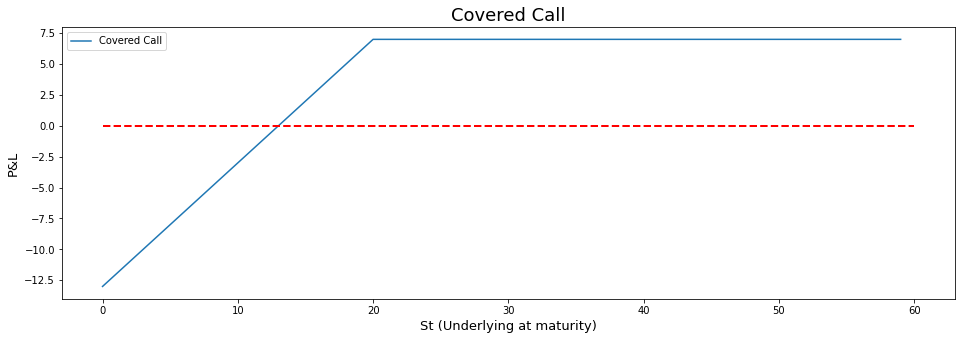

In [34]:
df = pd.DataFrame(data=list(range(0,60)),columns=["St"])
df["Covered Call"] = df["St"].apply(lambda x: covered_call_profit(s0,x,strike,price_call))
df.plot(x="St",y="Covered Call",figsize=(16,5))
plt.ylabel("P&L",size=13)
plt.xlabel("St (Underlying at maturity)",size=13)
plt.title("Covered Call",size=18)
plt.hlines(y= 0, xmin= 0, xmax= 60, color='red', linestyle ='dashed', linewidth = 2);

### Call Spread:

In [31]:
strike1 = 15
strike2 = 25
price1 = 3
price2 = 1

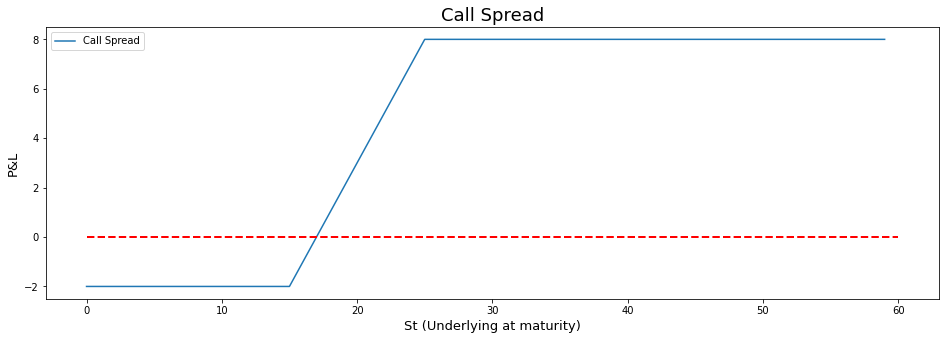

In [33]:
df = pd.DataFrame(data=list(range(0,60)),columns=["St"])
df["Call Spread"] = df["St"].apply(lambda x: call_spread_profit(strike1,strike2,price1,price2,x))
df.plot(x="St",y="Call Spread",figsize=(16,5))
plt.ylabel("P&L",size=13)
plt.xlabel("St (Underlying at maturity)",size=13)
plt.title("Call Spread",size=18)
plt.hlines(y= 0, xmin= 0, xmax= 60, color='red', linestyle ='dashed', linewidth = 2);

### Straddle:

In [35]:
strike = 30
price_call = 3
price_put = 2

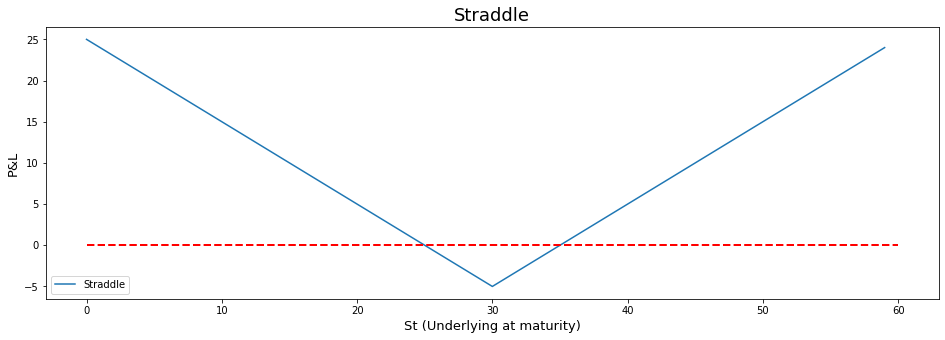

In [38]:
df = pd.DataFrame(data=list(range(0,60)),columns=["St"])
df["Straddle"] = df["St"].apply(lambda x: straddle_profit(strike,x,price_call,price_put))
df.plot(x="St",y="Straddle",figsize=(16,5))
plt.ylabel("P&L",size=13)
plt.xlabel("St (Underlying at maturity)",size=13)
plt.title("Straddle",size=18)
plt.hlines(y= 0, xmin= 0, xmax= 60, color='red', linestyle ='dashed', linewidth = 2);

### Butterfly:

In [45]:
strike1 = 20
strike2 = 30
strike3 = 40
price1 = 5
price2 = 2
price3 = 1.5

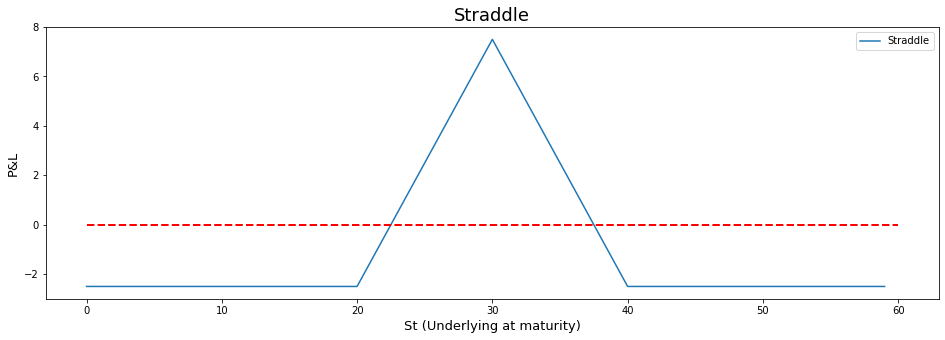

In [46]:
df = pd.DataFrame(data=list(range(0,60)),columns=["St"])
df["Straddle"] = df["St"].apply(lambda x: butterfly_profit(strike1, strike2, strike3, price1, price2, price3, x))
df.plot(x="St",y="Straddle",figsize=(16,5))
plt.ylabel("P&L",size=13)
plt.xlabel("St (Underlying at maturity)",size=13)
plt.title("Straddle",size=18)
plt.hlines(y= 0, xmin= 0, xmax= 60, color='red', linestyle ='dashed', linewidth = 2);